import some packages that's we need

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "/Library/Developer/CommandLineTools/usr/bin/python3"
  * The NumPy version is: "1.19.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Users/leriou/Library/Python/3.8/lib/python/site-packages/numpy/core/_multiarray_umath.cpython-38-darwin.so, 0x0002): tried: '/Users/leriou/Library/Python/3.8/lib/python/site-packages/numpy/core/_multiarray_umath.cpython-38-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e')), '/usr/local/lib/_multiarray_umath.cpython-38-darwin.so' (no such file), '/usr/lib/_multiarray_umath.cpython-38-darwin.so' (no such file)


draw something

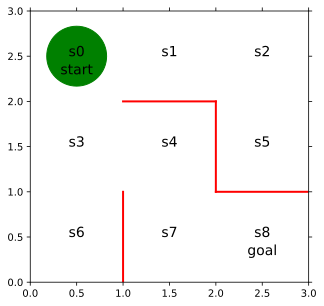

In [3]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([1,1],[0,1],color='red',linewidth=2)
plt.plot([1,2],[2,2],color='red',linewidth=2)
plt.plot([2,2],[2,1],color='red',linewidth=2)
plt.plot([2,3],[1,1],color='red',linewidth=2)

plt.text( .5,2.5,'s0',size=14,ha='center')
plt.text(1.5,2.5,'s1',size=14,ha='center')
plt.text(2.5,2.5,'s2',size=14,ha='center')
plt.text( .5,1.5,'s3',size=14,ha='center')
plt.text(1.5,1.5,'s4',size=14,ha='center')
plt.text(2.5,1.5,'s5',size=14,ha='center')
plt.text( .5,0.5,'s6',size=14,ha='center')
plt.text(1.5, .5,'s7',size=14,ha='center')
plt.text(2.5, .5,'s8',size=14,ha='center')
plt.text( .5,2.3,'start',size=14,ha='center')
plt.text(2.5, .3,'goal',size=14,ha='center')

ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both',which='both',bottom='off',top='off',
                labelbottom='off',left='off',right='off',labelleft='off')

line, = ax.plot([ .5],[2.5],marker='o',color='g',markersize=60)

In [4]:
theta_0 = np.array([[np.nan, 1, 1, np.nan], # s0
                    [np.nan, 1, np.nan, 1], # s1
                    [np.nan, np.nan, 1, 1], # s2
                    [1     , 1, 1, np.nan], #s3
                    [np.nan, np.nan, 1, 1], #s4
                    [1, np.nan, np.nan, np.nan], # s5
                    [1, np.nan, np.nan, np.nan], # s6
                    [1, 1, np.nan, np.nan], # s7
                   ])

In [5]:
def simple_convert_into_pi_from_theta(theta):
    [m,n] = theta.shape
    pi = np.zeros((m,n))
    for i in range(0,m):
        pi[i,:] = theta[i,:]/np.nansum(theta[i,:])
    pi = np.nan_to_num(pi)
    return pi
pi_0 = simple_convert_into_pi_from_theta(theta_0)    
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [6]:
def get_next_s(pi, s):
    direction = {
        'up': -3,
        'right': 1,
        'down': 3,
        'left': -1
    }
    next_direction = np.random.choice([i for i in direction.keys()], p=pi[s,:])
    return s + direction[next_direction]

def goal_maze(pi):
    s = 0
    state_history = [0]
    while True:
        next_s = get_next_s(pi,s)
        state_history.append(next_s)
        if next_s == 8:
            break
        else:
            s = next_s
    return state_history
state_history = goal_maze(pi_0)
print(state_history)

[0, 3, 6, 3, 4, 3, 6, 3, 0, 1, 2, 1, 0, 1, 2, 5, 2, 5, 2, 1, 2, 1, 0, 1, 0, 3, 4, 3, 4, 3, 6, 3, 0, 3, 4, 7, 4, 7, 4, 7, 4, 7, 8]


In [7]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([],[])
    return (line,)
def animate(i):
    state = state_history[i]
    x = (state % 3) + .5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)
anim = animation.FuncAnimation(fig, animate,init_func=init, 
                              frames=len(state_history),interval=300, repeat=False)
HTML(anim.to_jshtml())

In [8]:
def softmax_convert_into_pi_from_theta(theta):
    beta = 1.0
    [m,n] = theta.shape
    pi = np.zeros((m,n))
    exp_theta = np.exp(beta * theta)
    for i in range(0,m):
        pi[i,:] = exp_theta[i,:] / np.nansum(exp_theta[i,:])
    pi = np.nan_to_num(pi)
    return pi
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [9]:
def get_action_and_next_s(pi, s):
    dire = {
        'up': [0, -3],
        'right':[1, 1],
        'down': [2, 3],
        'left': [3, -1]
    }
    next_dire = np.random.choice([i for i in dire.keys()], p=pi[s,:])
    return [dire[next_dire][0],s + dire[next_dire][1]]

def goal_maze_ret_s_a(pi):
    s = 0
    s_a_history = [[0, np.nan]]
    while True:
        [act, next_s] = get_action_and_next_s(pi,s)
        s_a_history[-1][1] = act
        s_a_history.append([next_s, np.nan])
        if next_s == 8:
            break
        else:
            s = next_s
    return s_a_history

s_a_history = goal_maze_ret_s_a(pi_0)

In [10]:
def update_theta(theta, pi, s_a_history):
    # 学习率
    eta = .1
    # 到达目标的总步数 
    T = len(s_a_history) - 1
    [m,n] = theta.shape
    delta_theta = theta.copy()
    for i in range(0,m):
        for j in range(0,n):
            if not(np.isnan(theta[i,j])):
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                SA_ij = [SA for SA in s_a_history if SA == [i,j]]
                N_i,N_ij = len(SA_i),len(SA_ij)
                delta_theta[i,j] = (N_ij - pi[i,j] * N_i) /T
    new_theta = theta + eta * delta_theta
    return new_theta

new_theta = update_theta(theta_0,pi_0,s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49925373 0.50074627 0.        ]
 [0.         0.50037313 0.         0.49962687]
 [0.         0.         0.49981343 0.50018657]
 [0.33349919 0.3332504  0.3332504  0.        ]
 [0.         0.         0.49869403 0.50130597]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.50018657 0.49981343 0.         0.        ]]


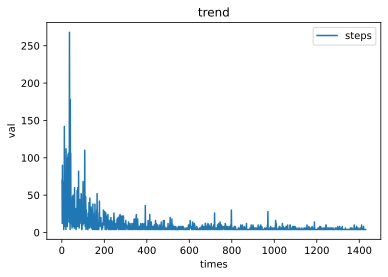

In [11]:
stop_epsilon = 10**-3
theta,pi = theta_0,pi_0
is_continue,count = True,1
x,y,z = [],[],[]
while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta,pi,s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    # 调试
    x.append(count)
    y.append(np.sum(np.abs(new_pi-pi)))
    z.append(len(s_a_history) - 1)
    count += 1
#     print(np.sum(np.abs(new_pi-pi)))
#     print("total steps to resolve maze: ", len(s_a_history) - 1)
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

plt.plot(x, z, label='steps')  # Plot some data on the (implicit) axes.
# plt.plot(x, y, label='delta_pi')
plt.xlabel('times')
plt.ylabel('val')
plt.title("trend")
plt.legend();

In [12]:
np.set_printoptions(precision=3,suppress=True)
print(pi)
print(s_a_history)

[[0.    0.041 0.959 0.   ]
 [0.    0.329 0.    0.671]
 [0.    0.    0.429 0.571]
 [0.03  0.936 0.034 0.   ]
 [0.    0.    0.939 0.061]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.046 0.954 0.    0.   ]]
[[0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]


In [13]:
def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + .5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)
anim = animation.FuncAnimation(fig, animate,init_func=init, 
                              frames=len(s_a_history),interval=200, repeat=False)
HTML(anim.to_jshtml())